###### PROJECT CODE ######

# Analysis of CSFD and IMDB movie ratings 

### Kateřina Havelková, Jolana Čermáková

We have decided to focus on a movie analysis as we both watch movies often and therefore we were interested in the fact how the most famous movie databases work from inside out. We were following the procedure of web scraping and implementing it on both the CSDF and IMDB databases. 
We considered reasonable number of top movies from both websites and looked for the differences between them. 

The biggest obstacle was to compare the number of votes quantitatively as on CSFD there is no particular number of votes given. There is just number of fans instead, which does not correspond to the total number of reviews. Because of that, we were forced to rely particularly on movie ratings - on IMDB, the movie rating is stated in two measures - basic 10-scale rating and also metascore obtained from professional movie critics. On CSFD, the movie rating is stated in one measure in percent. 


#### First obtaining top rated films from CSFD page

In [1]:
#300 top rated movies by CSFD

In [2]:
from requests import get
url = 'https://www.csfd.cz/zebricky/nejoblibenejsi-filmy/?show=complete'
response = get(url)
print(response.text[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="cs" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
	<meta name="description" content="ČSFD.cz">
	<meta name="theme-color" content="#bb0011">


	<title>Žebříčky | ČSFD.cz</title>

	<link rel="shortcut icon" href="htt


In [3]:
from bs4 import BeautifulSoup


In [4]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [5]:
#aggregating data: name of the film and release year

In [6]:
movie_containers = html_soup.find_all('td', class_ = 'film')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
300


In [7]:
##aggregating data: csfd rating

In [8]:
movie_ratings = html_soup.find_all('td', class_ = 'average')
print(type(movie_ratings))
print(len(movie_ratings))

<class 'bs4.element.ResultSet'>
300


In [9]:
##aggregating data: fans number

In [10]:
fans_number = html_soup.find_all('td', class_ = 'count')
print(type(fans_number))
print(len(fans_number))

<class 'bs4.element.ResultSet'>
300


In [11]:
##aggregating data: order of the films

In [12]:
favourite_order = html_soup.find_all('td', class_ = 'order')
print(type(favourite_order))
print(len(favourite_order))

<class 'bs4.element.ResultSet'>
300


In [13]:
## Lists to store the scraped data in
names = []
years = []
csfd_ratings = []
fans = []

for container in movie_containers:
    
       # name of the film
        name = container.a.text
        names.append(name)
        # release year
        year = container.find('span', class_ = 'film-year').text
        years.append(year)


In [14]:
for container in movie_ratings:
        # The CSFD rating
        csfd = container.text
        csfd_ratings.append(csfd)


In [15]:
for container in fans_number:
        # The number of fans
        fan = container.text
        fans.append(fan)

In [16]:
#table creation

In [17]:
import pandas as pd
movie_ratings = pd.DataFrame({'Movie': names,
                       'Year': years,
                       'CSFD rating': csfd_ratings,
                      'Fans number': fans
                       })
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
Movie          300 non-null object
Year           300 non-null object
CSFD rating    300 non-null object
Fans number    300 non-null object
dtypes: object(4)
memory usage: 9.5+ KB
None


,Movie,Year,CSFD rating,Fans number
0,Forrest Gump,(1994),"94,5%",19327 fanoušků
1,Vykoupení z věznice Shawshank,(1994),"95,3%",17952 fanoušků
2,Pulp Fiction: Historky z podsvětí,(1994),"90,6%",16022 fanoušků
3,Temný rytíř,(2008),"90,2%",10887 fanoušků
4,Pán prstenů: Společenstvo Prstenu,(2001),"90,4%",10058 fanoušků
5,Počátek,(2010),"88,6%",9083 fanoušků
6,Zelená míle,(1999),"92,8%",8409 fanoušků
7,Matrix,(1999),"90,1%",8201 fanoušků
8,Pán prstenů: Návrat krále,(2003),"90,3%",8119 fanoušků
9,Pelíšky,(1999),"91,2%",7008 fanoušků


In [18]:
#examing the data and cleaning the data
movie_ratings['Year'].unique()

array(['(1994)', '(2008)', '(2001)', '(2010)', '(1999)', '(2003)',
       '(1972)', '(2011)', '(1995)', '(2002)', '(2009)', '(1975)',
       '(2000)', '(1991)', '(2012)', '(2014)', '(2006)', '(1993)',
       '(1979)', '(2005)', '(1998)', '(2007)', '(1997)', '(1968)',
       '(1996)', '(1977)', '(1980)', '(2013)', '(2004)', '(1986)',
       '(1985)', '(1971)', '(1987)', '(1966)', '(1976)', '(1984)',
       '(1983)', '(2016)', '(1988)', '(1990)', '(1974)', '(1982)',
       '(1957)', '(1989)', '(2018)', '(1992)', '(2015)', '(1981)',
       '(1961)', '(1959)', '(1953)', '(2019)', '(1960)', '(1973)',
       '(2017)', '(1969)'], dtype=object)

In [19]:
movie_ratings['CSFD rating'].unique()

array(['94,5%', '95,3%', '90,6%', '90,2%', '90,4%', '88,6%', '92,8%',
       '90,1%', '90,3%', '91,2%', '91,8%', '91,4%', '88,1%', '92,3%',
       '88,3%', '82,3%', '92,6%', '85,8%', '90,7%', '82,6%', '87,6%',
       '86,2%', '84,8%', '87,4%', '84,1%', '87,8%', '92,4%', '84,4%',
       '87,9%', '89,6%', '87,3%', '89,1%', '85,7%', '88,0%', '86,3%',
       '87,0%', '81,1%', '89,7%', '84,6%', '83,5%', '89,5%', '81,9%',
       '86,9%', '81,6%', '84,0%', '89,3%', '82,8%', '86,7%', '86,4%',
       '88,2%', '83,6%', '88,8%', '77,2%', '77,4%', '78,2%', '82,7%',
       '80,1%', '84,7%', '90,0%', '86,5%', '85,1%', '87,2%', '88,7%',
       '79,8%', '80,9%', '78,8%', '80,7%', '66,6%', '86,8%', '84,2%',
       '81,0%', '88,4%', '86,1%', '78,4%', '90,9%', '81,4%', '89,0%',
       '81,7%', '77,0%', '83,0%', '87,1%', '80,2%', '78,7%', '86,6%',
       '89,4%', '77,5%', '77,7%', '79,0%', '79,6%', '80,4%', '80,8%',
       '85,5%', '51,9%', '80,6%', '72,2%', '73,2%', '87,5%', '80,0%',
       '88,9%', '82,

In [20]:
#removing %
movie_ratings.loc[:, 'CSFD rating'] = movie_ratings['CSFD rating'].str.strip('%')

In [21]:
#as float
movie_ratings.loc[:, 'CSFD rating'] = movie_ratings['CSFD rating'].str.replace(',','.').astype(float)

In [22]:
movie_ratings['CSFD rating'].head(3)

0    94.5
1    95.3
2    90.6
Name: CSFD rating, dtype: float64

In [23]:
#year as float
movie_ratings.loc[:, 'Year'] = movie_ratings['Year'].str[-5:-1].astype(int)

In [24]:
movie_ratings['Year'].head(3)

0    1994
1    1994
2    1994
Name: Year, dtype: int32

In [25]:
#removing 'fanoušků'
movie_ratings.loc[:, 'Fans number'] = movie_ratings['Fans number'].str.strip('fanoušků')

In [26]:
movie_ratings['Fans number'].head(3)

0    19327 
1    17952 
2    16022 
Name: Fans number, dtype: object

In [27]:
#as integer
movie_ratings.loc[:, 'Fans number'] = movie_ratings['Fans number'].astype(int)

In [28]:
movie_ratings['Fans number'].head(3)

0    19327
1    17952
2    16022
Name: Fans number, dtype: int32

In [29]:
movie_ratings.describe().loc[['min', 'max'], ['CSFD rating', 'Fans number', 'Year']]

,CSFD rating,Fans number,Year
min,51.9,595.0,1953.0
max,96.1,19327.0,2019.0


In [30]:
#Hence from the top ranked 300 films, the best CSFD rating is 96.1% and lowest is 51.9%.

#### Now, we need to obtain data from IMDB page

In order for us to have the most comparable list of fims from IMDB page with respect to CSFD page, we employ advanced search.
From the CSFD list we know, that the oldest film in the top rated films list is from 1953, hence we contrain the IMDB search to an interval 1.1.1953 - 1.1.2019.
Furthermore, the list is sorted by the number of votes and in a descending order.

IMDB page offers not only IMDB rating but also Metascore rating. The IMDb score is generated by the IMDb users' ratings while the Metascore ratings are the scores from the website Metacritic.com. Scores are given by movie critics and the weighted score is assigned to a film. Hence, we employ both of these ratings for further comparison.

In [3]:
from requests import get
url3 = 'https://www.imdb.com/search/title?release_date=1953-01-01,2019-01-01&sort=num_votes,desc&start=01&ref_=adv_nxt'
response = get(url3)
print(response.text[:500])





<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [4]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [5]:
movie_containers3 = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers3))
print(len(movie_containers3))

<class 'bs4.element.ResultSet'>
50


In [6]:
#First 50 movies
# Lists to store the scraped data in
names3 = []
years3 = []
imdb_ratings3 = []
metascores3 = []
votes3 = []

for container in movie_containers3:
# If the movie has Metascore, then extract:
       if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name3 = container.h3.a.text
        names3.append(name3)
# The year
        year3 = container.h3.find('span', class_ = 'lister-item-year').text
        years3.append(year3)
# The IMDB rating
        imdb3 = float(container.strong.text)
        imdb_ratings3.append(imdb3)
# The Metascore
        m_score3 = container.find('span', class_ = 'metascore').text
        metascores3.append(int(m_score3))
# The number of votes
        vote3 = container.find('span', attrs = {'name':'nv'})['data-value']
        votes3.append(int(vote3))

In [7]:
import pandas as pd
test_df3 = pd.DataFrame({'Movie': names3,
'Year': years3,
'IMDB rating': imdb_ratings3,
'Metascore': metascores3,
'Number of votes': votes3
})
print(test_df3.info())
test_df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Movie              48 non-null object
Year               48 non-null object
IMDB rating        48 non-null float64
Metascore          48 non-null int64
Number of votes    48 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ KB
None


,Movie,Year,IMDB rating,Metascore,Number of votes
0,Vykoupení z věznice Shawshank,(1994),9.3,80,2099576
1,Temný rytíř,(2008),9.0,84,2065894
2,Počátek,(2010),8.8,74,1840057
3,Klub rváčů,(1999),8.8,66,1678634
4,Pulp Fiction: Historky z podsvětí,(1994),8.9,94,1641702
5,Forrest Gump,(1994),8.8,82,1611271
6,Pán prstenů: Společenstvo prstenu,(2001),8.8,92,1510508
7,Matrix,(1999),8.7,73,1508650
8,Pán prstenů: Návrat krále,(2003),8.9,94,1494648
9,Kmotr,(1972),9.2,100,1441374


As not every film has Metascore, in order to have films with both of these ratings, we exclude those who do not have the Metascore.


In [8]:
interval = [str(i) for i in [1,51,101,151,201,251,301]]


In [9]:
#Apparently, IMDB translates some films' names into Czech. 
#As not all films are translated, or they are not translated properly, we will keep this list of films in English language.
headers = {"Accept-Language": "en-US, en;q=0.5"} 

IMDB offers only 50 outputs per page. 
Thus, we need to employ loop function in order to have a relatively same number of observations from both servers.
Next step takes approximately 3mins for computer to process.

In [10]:
from time import time

In [11]:
# The lists to store data in
names3 = []
years3 = []
imdb_ratings3 = []
metascores3 = []
votes3 = []

#The loop
start_time = time()
requests = 0

for start in interval:

        # Get request
        response = get('https://www.imdb.com/search/title?release_date=1953-01-01,2019-01-01&sort=num_votes,desc&start=' + start, headers = headers)
        
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Selected all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        for container in mv_containers:
           # # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name3 = container.h3.a.text
                names3.append(name3)

                # Scrape the year
                year3 = container.h3.find('span', class_ = 'lister-item-year').text
                years3.append(year3)

                # Scrape the IMDB rating
                imdb3 = float(container.strong.text)
                imdb_ratings3.append(imdb3)

                # Scrape the Metascore
                m_score3 = container.find('span', class_ = 'metascore').text
                metascores3.append(int(m_score3))

                # Scrape the number of votes
                vote3 = container.find('span', attrs = {'name':'nv'})['data-value']
                votes3.append(int(vote3))

In [12]:
#list
movie_ratings3 = pd.DataFrame({'Movie': names3,
'Year': years3,
'IMDB rating': imdb_ratings3,
'Metascore': metascores3,
'Number of votes': votes3
})
print(movie_ratings3.info())
movie_ratings3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
Movie              335 non-null object
Year               335 non-null object
IMDB rating        335 non-null float64
Metascore          335 non-null int64
Number of votes    335 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.2+ KB
None


,Movie,Year,IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,(1994),9.3,80,2099576
1,The Dark Knight,(2008),9.0,84,2065894
2,Inception,(2010),8.8,74,1840057
3,Fight Club,(1999),8.8,66,1678634
4,Pulp Fiction,(1994),8.9,94,1641702
5,Forrest Gump,(1994),8.8,82,1611271
6,The Lord of the Rings: The Fellowship of the Ring,(2001),8.8,92,1510508
7,The Matrix,(1999),8.7,73,1508650
8,The Lord of the Rings: The Return of the King,(2003),8.9,94,1494648
9,The Godfather,(1972),9.2,100,1441374


In [13]:
##now, we need to clean the data

In [14]:
#year to integer

In [15]:
movie_ratings3.loc[:, 'Year'] = movie_ratings3['Year'].str[-5:-1].astype(int)

In [16]:
movie_ratings3['Year'].head(3)

0    1994
1    2008
2    2010
Name: Year, dtype: int32

In [17]:
#normalizing IMDB rating so they are comparable with CSFD rating and Metascore

In [18]:
movie_ratings3['Normalized IMDB rating'] = movie_ratings3['IMDB rating'] * 10

In [19]:
movie_ratings3.head(5)

,Movie,Year,IMDB rating,Metascore,Number of votes,Normalized IMDB rating
0,The Shawshank Redemption,1994,9.3,80,2099576,93.0
1,The Dark Knight,2008,9.0,84,2065894,90.0
2,Inception,2010,8.8,74,1840057,88.0
3,Fight Club,1999,8.8,66,1678634,88.0
4,Pulp Fiction,1994,8.9,94,1641702,89.0


In [20]:
#reordering the columns
movie_ratings3 = movie_ratings3[['Movie', 'Year', 'IMDB rating','Normalized IMDB rating', 'Metascore', 'Number of votes']]

In [21]:
movie_ratings3.head(5)

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,1994,9.3,93.0,80,2099576
1,The Dark Knight,2008,9.0,90.0,84,2065894
2,Inception,2010,8.8,88.0,74,1840057
3,Fight Club,1999,8.8,88.0,66,1678634
4,Pulp Fiction,1994,8.9,89.0,94,1641702


#####Visualisation of data and analysis#####

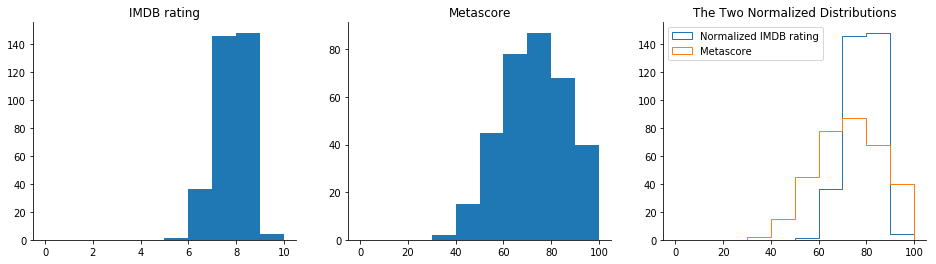

In [52]:
###First comparing distributions of IMDB rating and Metascore
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings3['IMDB rating'], bins = 10, range = (0,10))
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100)) 
ax2.set_title('Metascore')
ax3.hist(movie_ratings3['Normalized IMDB rating'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

Starting with the IMDB histogram, we can see that most ratings are between 6 and 8. There are few movies with a rating greater than 8, and even fewer with a rating smaller than 4.

The distribution of Metascore ratings is more diverse, peaking at the value of approximately 75. From this peak, the frequencies gradually decrease toward extreme rating values. 

On the comparative graph, it’s clearer that the IMDB distribution is highly skewed toward the higher part of the average ratings, while the Metascore ratings seem to have a much more balanced distribution.

In [93]:
#Secondly, comparing distributions of CSFD rating and IMDB rating

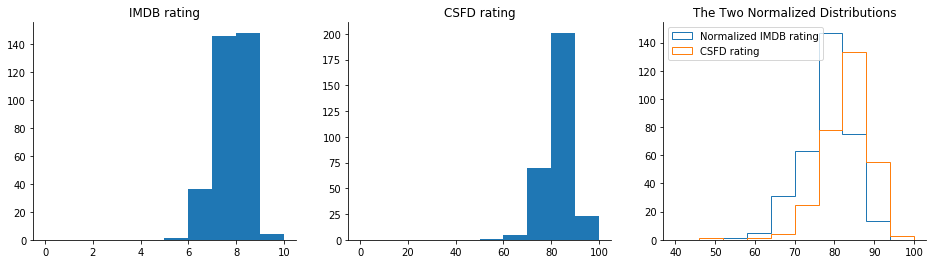

In [51]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax4, ax5, ax6 = fig.axes
ax4.hist(movie_ratings3['IMDB rating'], bins = 10, range = (0,10)) 
ax4.set_title('IMDB rating')
ax5.hist(movie_ratings['CSFD rating'], bins = 10, range = (0,100)) 
ax5.set_title('CSFD rating')
ax6.hist(movie_ratings3['Normalized IMDB rating'], bins = 10, range = (40,100), histtype = 'step')
ax6.hist(movie_ratings['CSFD rating'], bins = 10, range = (40,100), histtype = 'step')
ax6.legend(loc = 'upper left')
ax6.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

For the CSFD case, distribution seems to be even more unilateral compared to that from IMDB.
Interpretation of the last historgram must be done carefully, as there are different films in both data sets. 
Nevertheless, in general, the results suggest that the IMDB users tend to be more critical in the ratings of the films.

In [95]:
#Lastly, comparing distribution of CSFD rating and Metascore

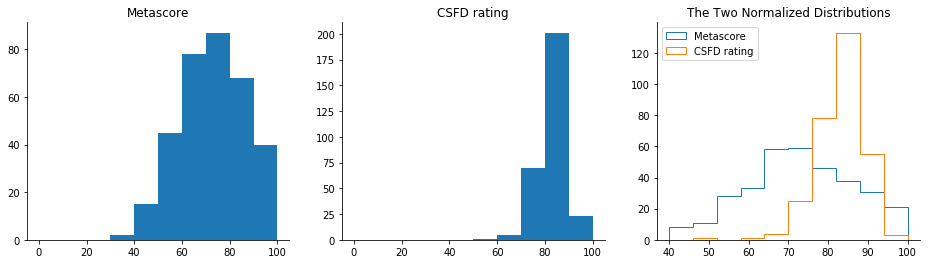

In [52]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax7, ax8, ax9 = fig.axes
ax7.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100)) 
ax7.set_title('Metascore')
ax8.hist(movie_ratings['CSFD rating'], bins = 10, range = (0,100)) 
ax8.set_title('CSFD rating')
ax9.hist(movie_ratings3['Metascore'], bins = 10, range = (40,100), histtype = 'step')
ax9.hist(movie_ratings['CSFD rating'], bins = 10, range = (40,100), histtype = 'step')
ax9.legend(loc = 'upper left')
ax9.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

Again, interpretation of the last historgram must be done carefully, as there are different films in both data sets. Metascore ratings seem to have a much more balanced distribution.

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\uzivatel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


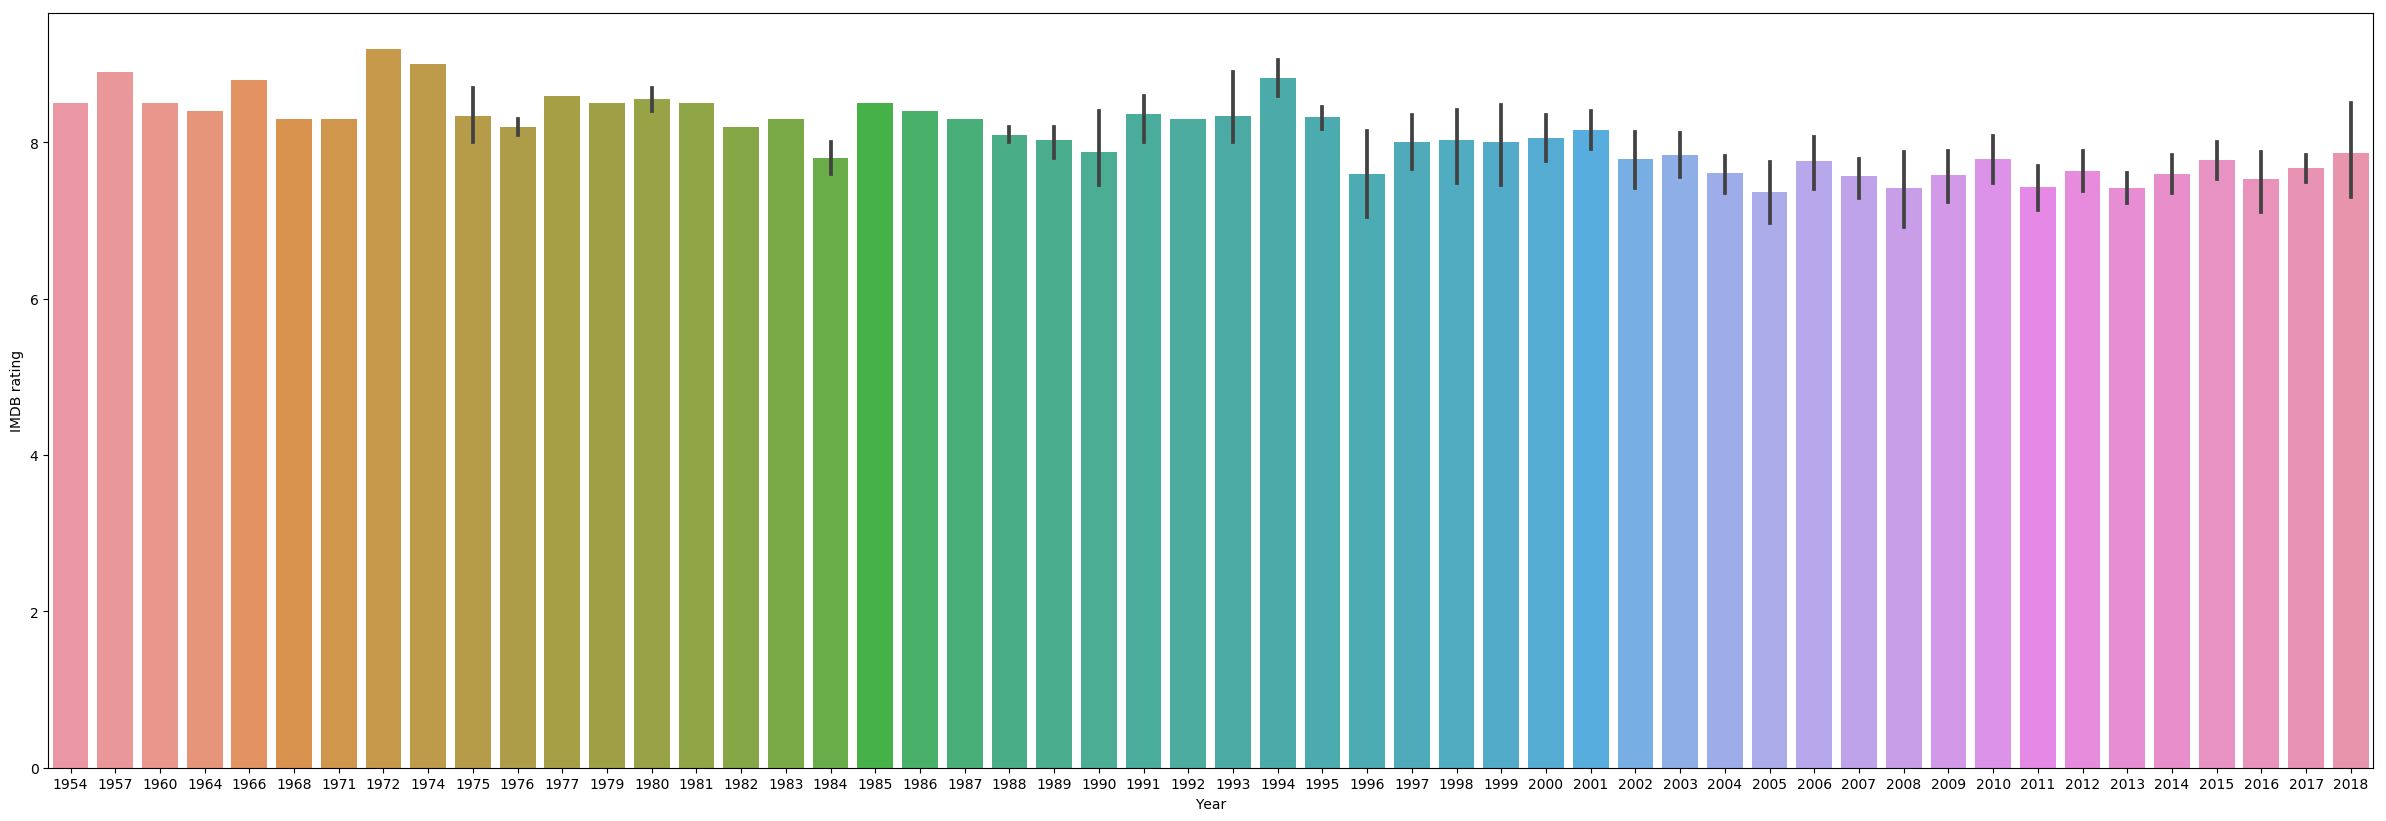

In [55]:
##Relationship of Year and Rating - IMDB
plt.figure(figsize=[30,10], dpi=100)
sns.barplot(x='Year', y='IMDB rating', data=movie_ratings3)

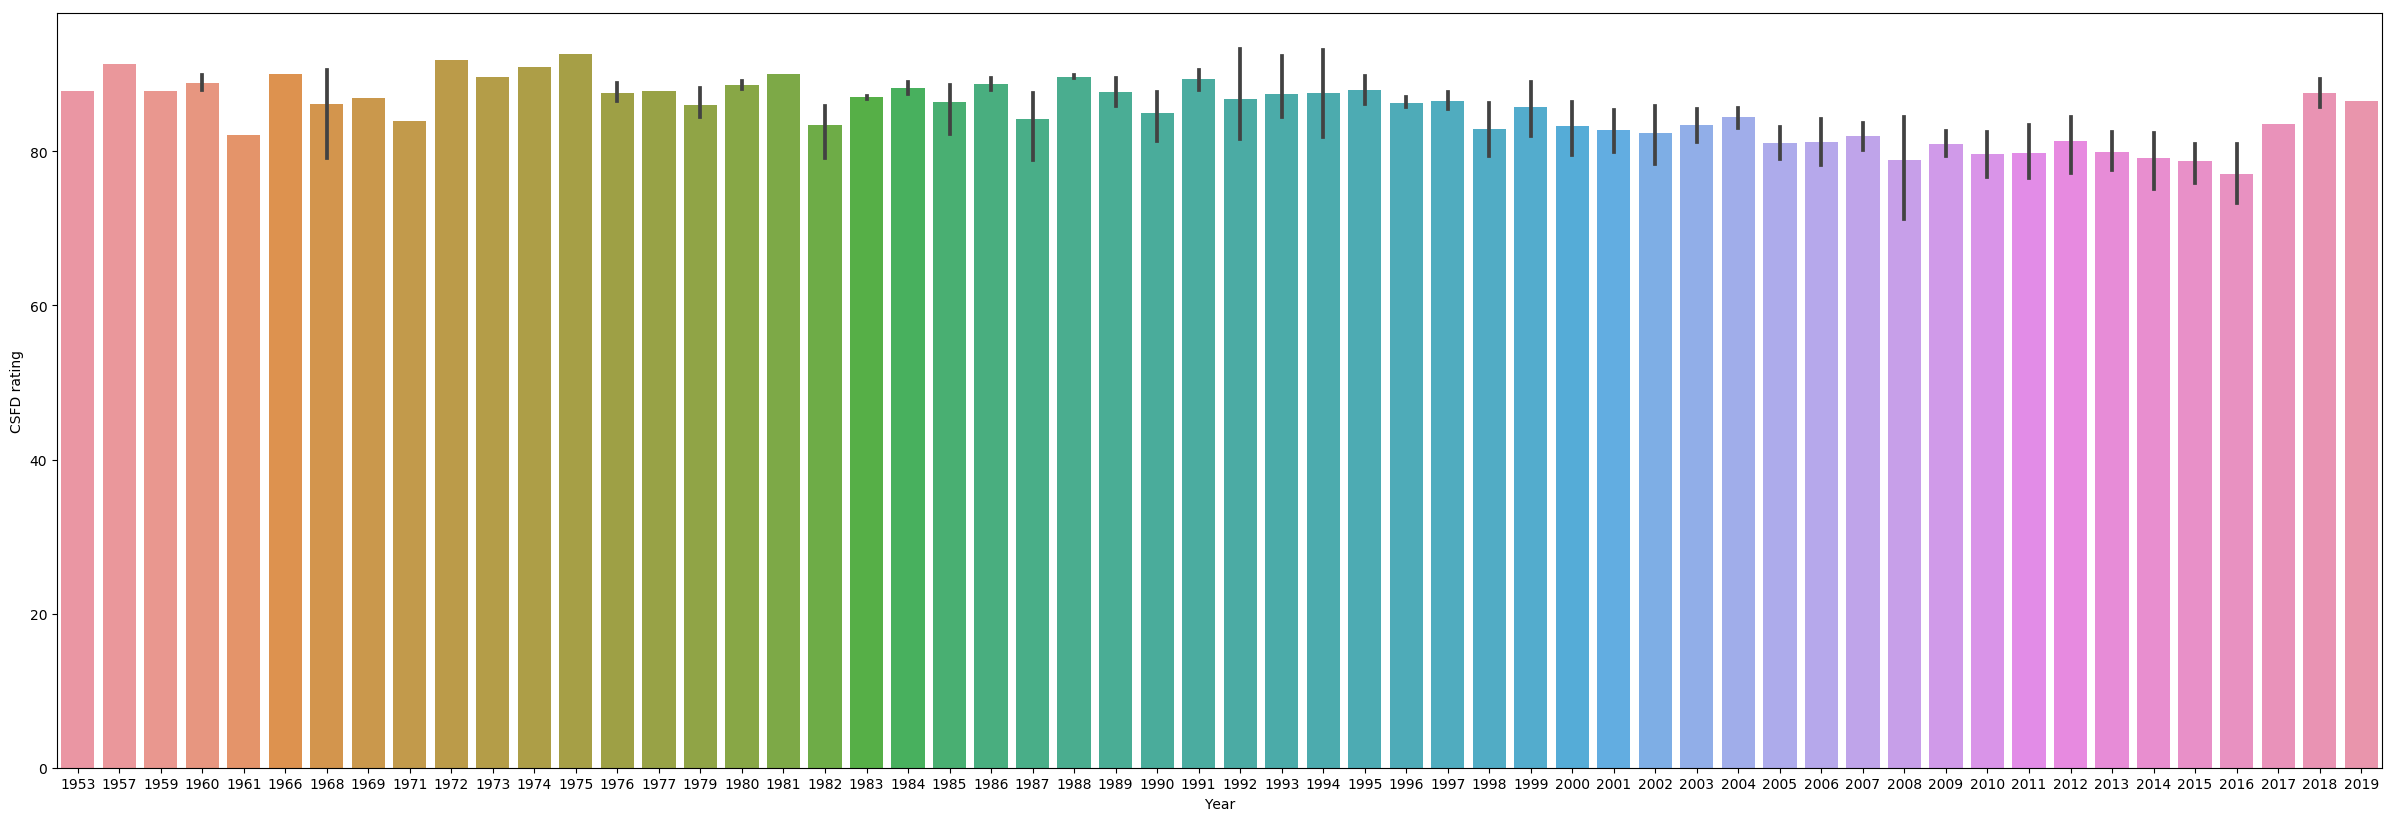

In [56]:
##Relationship of Year and Rating - CSFD
plt.figure(figsize=[30,10], dpi=100)
sns.barplot(x='Year', y='CSFD rating', data=movie_ratings)

Text(0.5,1,'Number of votes vs. IMDB rating')

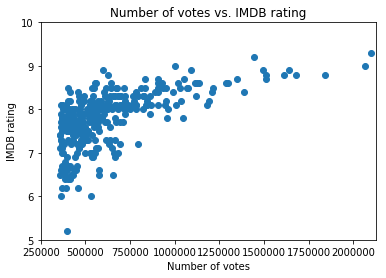

In [55]:
#Relationship between Rating and number of votes for IMDB
plt.scatter(movie_ratings3['Number of votes'], movie_ratings3['IMDB rating'])

#axis labels
plt.xlabel('Number of votes')
plt.ylabel('IMDB rating')

# set axis limits
plt.xlim([250000, 2125000])
plt.ylim([5, 10])
plt.title('Number of votes vs. IMDB rating')



A majority of votes is scattered in the interval between 250000 and 750000. There are two outliers in our IMDB dataset, which have more than 2mil votes.

Text(0.5,1,'Fans number vs. CSFD rating')

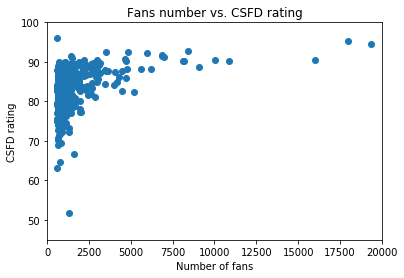

In [56]:
#Relationship between CSFD rating and number of fans
plt.scatter(movie_ratings['Fans number'], movie_ratings['CSFD rating'])

#axis labels
plt.xlabel('Number of fans')
plt.ylabel('CSFD rating')

# set axis limits
plt.xlim([0, 20000])
plt.ylim([45, 100])
plt.title('Fans number vs. CSFD rating')


For the CSFD case, a majority of films have a number of fans in interval from 0 ti 5000. There are multiple outliers, which have a number of fans higher than 15000.

Now we analyze a subset of the same films from both servers. From CSFD webpage we obtain Czech names of the films, while from IMDB webpage we get English names of the films. Hence, we are not able to compare the lists to find the same names by code, we must do it mannualy. For our analysis we select 10 movies which are present in both lists.

In [71]:
x = movie_ratings3[movie_ratings3['Movie'].isin(['Inception', 'Fight Club', 'Pulp Fiction','Forrest Gump', 'The Shawshank Redemption', 'The Godfather','The Avengers','Saving Private Ryan', 'The Prestige','Avatar'])]

In [72]:
x

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,1994,9.3,93.0,80,2099405
2,Inception,2010,8.8,88.0,74,1839915
3,Fight Club,1999,8.8,88.0,66,1678508
4,Pulp Fiction,1994,8.9,89.0,94,1641585
5,Forrest Gump,1994,8.8,88.0,82,1611139
9,The Godfather,1972,9.2,92.0,100,1441262
17,The Avengers,2012,8.1,81.0,69,1182987
21,Saving Private Ryan,1998,8.6,86.0,91,1111255
24,The Prestige,2006,8.5,85.0,66,1065856
26,Avatar,2009,7.8,78.0,83,1044511


In [73]:
m = movie_ratings[movie_ratings['Movie'].isin(['Avatar', 'Počátek','Klub rváčů','Pulp Fiction: Historky z podsvětí','Forrest Gump', 'Vykoupení z věznice Shawshank', 'Kmotr','Avengers','Zachraňte vojína Ryana','Dokonalý trik'])]

In [74]:
m

,Movie,Year,CSFD rating,Fans number
0,Forrest Gump,1994,94.5,19327
1,Vykoupení z věznice Shawshank,1994,95.3,17952
2,Pulp Fiction: Historky z podsvětí,1994,90.6,16022
5,Počátek,2010,88.6,9084
10,Kmotr,1972,91.8,6880
12,Klub rváčů,1999,88.1,6200
15,Avatar,2009,82.3,5206
21,Avengers,2012,82.6,4488
28,Dokonalý trik,2006,87.8,3504
34,Zachraňte vojína Ryana,1998,89.1,3093


In [76]:
m.reindex([1,5,12,2,0,10,21,34,28,15])

,Movie,Year,CSFD rating,Fans number
1,Vykoupení z věznice Shawshank,1994,95.3,17952
5,Počátek,2010,88.6,9084
12,Klub rváčů,1999,88.1,6200
2,Pulp Fiction: Historky z podsvětí,1994,90.6,16022
0,Forrest Gump,1994,94.5,19327
10,Kmotr,1972,91.8,6880
21,Avengers,2012,82.6,4488
34,Zachraňte vojína Ryana,1998,89.1,3093
28,Dokonalý trik,2006,87.8,3504
15,Avatar,2009,82.3,5206


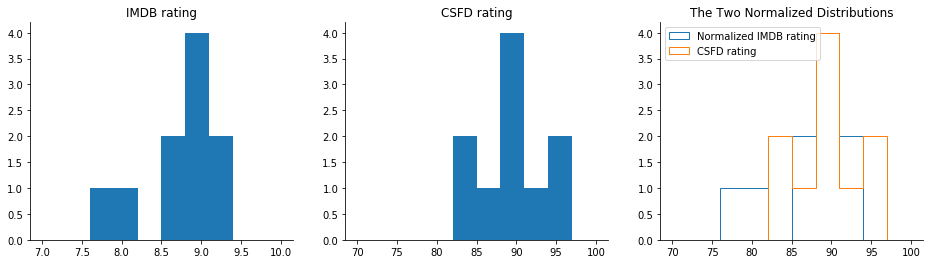

In [87]:
#plot
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax10, ax11, ax12 = fig.axes
ax10.hist(x['IMDB rating'], bins = 10, range = (7,10)) 
ax10.set_title('IMDB rating')
ax11.hist(m['CSFD rating'], bins = 10, range = (70,100)) 
ax11.set_title('CSFD rating')
ax12.hist(x['Normalized IMDB rating'], bins = 10, range = (70,100), histtype = 'step')
ax12.hist(m['CSFD rating'], bins = 10, range = (70,100), histtype = 'step')
ax12.legend(loc = 'upper left')
ax12.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

In these specific subsets, we have considered 10 movies of our own choice. All of them are very good movies, very well reviewed - that is the reason why we shrinked the plots to a range of 7 to 10 (there is no movie with a lower rating than 70%). We can see the differences in ratings pretty well on first two plots and the final comparison on the last plot. It seems, that people reviewing movies on IMDB are more sceptical, giving a lower rating to the identical movies. 

Visualization by decades

In [22]:
import pandas as pd

from math import floor

In [23]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"

In [57]:
movie_ratings3["decade"] = movie_ratings3["Year"].apply(extract_decade)

C:\Users\uzivatel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [58]:
df = movie_ratings3
df = df.sort_values(by=['decade'], ascending=True)
df

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes,decade
124,12 Angry Men,1957,8.9,89.0,96,595907,1950s
275,Rear Window,1954,8.5,85.0,100,399627,1950s
154,2001: A Space Odyssey,1968,8.3,83.0,82,543013,1960s
162,Psycho,1960,8.5,85.0,97,538514,1960s
254,Dr. Strangelove or: How I Learned to Stop Worr...,1964,8.4,84.0,97,415513,1960s
110,"The Good, the Bad and the Ugly",1966,8.8,88.0,90,623882,1960s
53,One Flew Over the Cuckoo's Nest,1975,8.7,87.0,83,832033,1970s
218,Monty Python and the Holy Grail,1975,8.3,83.0,93,462154,1970s
83,A Clockwork Orange,1971,8.3,83.0,80,689617,1970s
31,The Godfather: Part II,1974,9.0,90.0,90,1001876,1970s


In [59]:
df['vote_count']=df['Number of votes']
df_by_vote = df.groupby(['decade']).vote_count.sum().reset_index()

In [60]:
import pandas as pd
import numpy as np
import plotly as py


In [1]:
import plotly.graph_objs as go


In [41]:
init_notebook_mode(connected=True)

In [33]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [61]:
bar_data = [go.Bar(x=df_by_vote['decade']\
                   , y=df_by_vote["vote_count"],
                     marker=dict(
                        color='rgb(127,188,65)'
                    ))]

py.offline.iplot({ 'data': bar_data,
            'layout': {
               'title': 'Vote Count for each Decade',
               'xaxis': {
                 'title': 'Decade'},
               'yaxis': {
                'title': 'Total Votes'}
        }})

In [62]:
df[df['decade'] == '1950s']

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes,decade,vote_count
124,12 Angry Men,1957,8.9,89.0,96,595907,1950s,595907
275,Rear Window,1954,8.5,85.0,100,399627,1950s,399627


Getting rid of 1950s decade, since there are only two films included.

In [55]:
df = df[df['decade'] != '1950s']

In [56]:
da = []
for i in range(0,len(pd.unique(df['decade']))):
    trace = {
            "type": 'violin',
            "x": df['decade'][df['decade'] == pd.unique(df['decade'])[i]],
            "y": df['IMDB rating'][df['decade'] == pd.unique(df['decade'])[i]],
            "name": pd.unique(df['decade'])[i],
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            }
        }
    da.append(trace)

        
fig = {
    "data": da,
    "layout" : {
        "title": "Average Movie Ratings by Decade",
            "xaxis" : dict(title = 'Decade', autotick=False, showticklabels=True),
            "yaxis" : dict(title = 'Average Rating')
    }
}

iplot(fig, validate = False)

The following two plots highlight the difference in a number of votes for films released in different decades. Additionally, results suggest that IMDB users tend to be more critical to films released more recently, compared to the older films as the average is constantly decreasing in each decade. It might be due to the fact that people compare new movies to movies that they’ve seen in the past and deem them as original and better.

In overall, IMDB histogram distribution of 300 top rated films is more narrow compared to the Metascore rating which seems to have a much more balanced distribution. Our results suggest that IMDB users tend to be more skeptical when rating the films compared to the CSDF users. Furthermore, IMDB users are more critical to recently released films compared to the older classics.